## Sklearn pipelines

Pipelines are containers of steps. A step can be one of the following:

- Transformer
- Estimator
- Pipeline
- FeatureUnion

Pipelines are specially usefull to package the preprocessing of the data and model fitting in a single (serializable) object.



From the help of the PipeLine object:
```
Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement fit and transform methods.
The final estimator only needs to implement fit.


The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a '__', as in the example below.
A step's estimator may be replaced entirely by setting the parameter
with its name to another estimator, or a transformer removed by setting
to None.
```

In [1]:
import sklearn
from sklearn import pipeline

In [2]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

# generate some data to play with
X, y = samples_generator.make_classification(
    n_informative=5, n_redundant=0, random_state=42)

# ANOVA SVM-C
anova_filter = SelectKBest(f_regression, k=5)
clf = svm.SVC(kernel='linear')
svmpipe = Pipeline([('anova', anova_filter), ('svc', clf)])

/Users/davidbuchaca1/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Inspecting first part transformation

In [3]:
X.shape

(100, 20)

In [4]:
svmpipe.steps[0][1].fit(X,y)

SelectKBest(k=5, score_func=<function f_regression at 0x7f8f007e8c10>)

In [5]:
svmpipe.steps[0][1].transform(X).shape

(100, 5)

In [6]:
svmpipe.steps[0][1].__dict__

{'score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True)>,
 'k': 5,
 'n_features_in_': 20,
 'scores_': array([1.23977183e-01, 2.54349641e-01, 4.38691648e+00, 8.50993664e+00,
        3.05588566e-01, 3.05419416e-01, 7.24129592e-01, 2.22731093e+01,
        1.01372597e-01, 2.14898175e+01, 5.56918995e-03, 1.09088355e+01,
        7.25814092e-01, 4.85637398e-01, 2.00376966e+00, 4.91894354e-01,
        7.69678969e-01, 9.48327951e-01, 3.33672446e-01, 2.58987004e-01]),
 'pvalues_': array([7.25516352e-01, 6.15160920e-01, 3.87954258e-02, 4.37964905e-03,
        5.81658683e-01, 5.81763072e-01, 3.96867119e-01, 7.86760605e-06,
        7.50866172e-01, 1.09815358e-05, 9.40663608e-01, 1.33672777e-03,
        3.96320524e-01, 4.87529621e-01, 1.60078717e-01, 4.84745633e-01,
        3.82462045e-01, 3.32542871e-01, 5.64829416e-01, 6.11960827e-01])}

### Accessing pipeline attributes with part__fieldname

In [7]:
svmpipe.steps

[('anova',
  SelectKBest(k=5, score_func=<function f_regression at 0x7f8f007e8c10>)),
 ('svc', SVC(kernel='linear'))]

In [8]:
svmpipe.set_params(svc__C=0.3)

Pipeline(steps=[('anova',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x7f8f007e8c10>)),
                ('svc', SVC(C=0.3, kernel='linear'))])

### Fitting the pipeline

In [9]:
svmpipe.set_params(anova__k=7, svc__C=.1)

Pipeline(steps=[('anova',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7f8f007e8c10>)),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [10]:
svmpipe.fit(X, y)

Pipeline(steps=[('anova',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x7f8f007e8c10>)),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [11]:
prediction = svmpipe.predict(X)

In [12]:
svmpipe.score(X, y) 

0.82

In [13]:
svmpipe.named_steps['anova'].get_support()

array([False, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False,  True,
       False, False])

In [14]:
svmpipe.named_steps.anova.get_support()

array([False, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False,  True,
       False, False])

### Direct svm

In [15]:
clf = svm.SVC(kernel='linear')

In [16]:
clf.fit(X, y)

SVC(kernel='linear')

In [17]:
clf.score(X, y) 

0.9

## Example

In [30]:
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt

In [73]:
X = np.linspace(0,10,100) 
Y = 10*np.sin(X)+ np.array(range(100))
X = np.array([X]).T

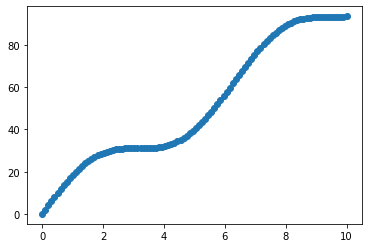

In [74]:
plt.scatter(X,Y)

In [119]:
import copy
Y_obs = copy.deepcopy(Y)
Y_obs = np.array([Y_obs]).T

In [120]:
Y_obs[10]= 1000
Y_obs[30]= 100



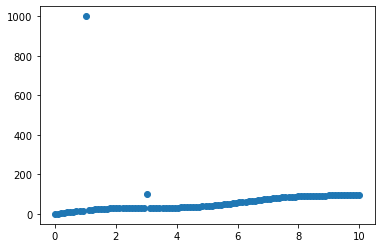

In [121]:
plt.scatter(X,Y_obs)

In [122]:
lin_reg = sklearn.linear_model.LinearRegression()

In [123]:
lin_reg.fit(X,Y_obs)

LinearRegression()

Fitting without a pipeline

### NO Pipeline: Model

In [210]:
lasso = sklearn.linear_model.Lasso()
lasso_cv = sklearn.model_selection.GridSearchCV(lasso, 
                                                cv=10, 
                                                param_grid={'alpha':np.linspace(1,2,10)})
lasso_cv.fit(X, Y_obs)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])})

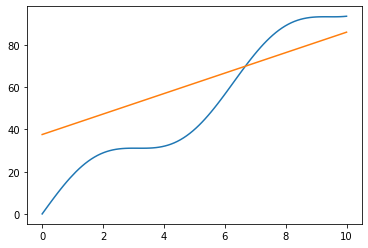

In [212]:
Y_hat = lasso_cv.predict(X)
idx = Y_obs<100
plt.plot(X[idx],Y_obs[idx])
plt.plot(X,Y_hat)

### Pipeline: Model + TransformedTargetRegressor

In [286]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [249]:
lasso = sklearn.linear_model.Lasso()

lasso_tt = TransformedTargetRegressor(regressor = lasso, 
                                      func = np.log,
                                      inverse_func = np.exp)

In [250]:
model_pipe = Pipeline([
    ('model', TransformedTargetRegressor(lasso))
])

model_pipe = GridSearchCV(model_pipe, 
                          param_grid= {'model__regressor__alpha':np.linspace(1,2,10)})

In [251]:
model_pipe.fit(X,Y_obs)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(regressor=Lasso()))]),
             param_grid={'model__regressor__alpha': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])})

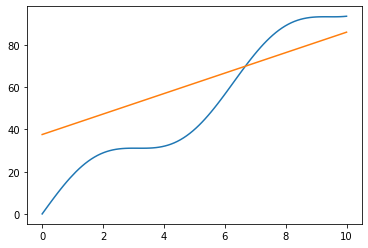

In [252]:
Y_hat = model_pipe.predict(X)
idx = Y_obs<100
plt.plot(X[idx],Y_obs[idx])
plt.plot(X,Y_hat)

## Pipeline: Model + scaler


https://stackoverflow.com/questions/61859341/does-including-a-scaler-in-sklearns-pipeline-scale-the-target-variable

In [277]:
scaler = MinMaxScaler()
scaler = sklearn.preprocessing.StandardScaler()
lasso = sklearn.linear_model.Lasso()

model_pipe = Pipeline([
    ('model', TransformedTargetRegressor(lasso, scaler))
])

model_pipe = GridSearchCV(model_pipe,
                          cv=12,
                          param_grid= {'model__regressor__alpha':np.linspace(1,2,10)})

model_pipe.fit(X,Y_obs)

/Users/davidbuchaca1/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass transformer=StandardScaler() as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


GridSearchCV(cv=12,
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(regressor=Lasso(),
                                                                   transformer=StandardScaler()))]),
             param_grid={'model__regressor__alpha': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])})

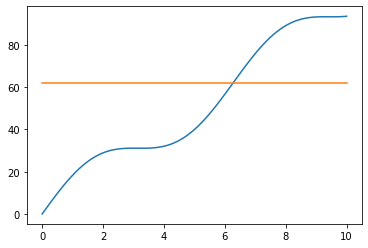

In [278]:
Y_hat = model_pipe.predict(X)
idx = Y_obs<100
plt.plot(X[idx],Y_obs[idx])
plt.plot(X,Y_hat)

### Pipeline: Model + Scaler

In [287]:
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()),
                           ('model', sklearn.linear_model.Lasso())])

model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

cv = KFold(n_splits=10, shuffle=True, random_state=1)



scores = cross_val_score(model, X, Y_obs, 
                         scoring='neg_mean_absolute_error', 
                         cv=cv,
                         n_jobs=-1)

In [294]:
scores

array([ -26.65509954, -112.78256889,  -29.72883539,  -24.17968789,
        -28.94445211,  -31.06540684,  -29.02051161,  -24.6976484 ,
        -32.89155603,  -34.00526053])

In [322]:

model = TransformedTargetRegressor(regressor=lasso, 
                                   transformer=MinMaxScaler())

model_pipe = Pipeline(steps=[('model', model)])

cv = KFold(n_splits=10, shuffle=True, random_state=1)

pipe_cv = GridSearchCV(model_pipe,
                          cv=cv,
                          param_grid= {'model__regressor__alpha':np.linspace(1,2,10)})

pipe_cv.fit(X,Y_obs)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(regressor=Lasso(),
                                                                   transformer=MinMaxScaler()))]),
             param_grid={'model__regressor__alpha': array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])})

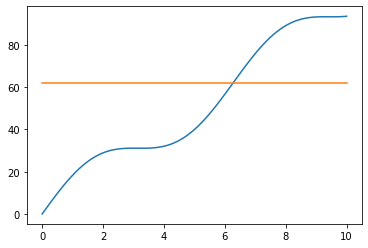

In [323]:
Y_hat = pipe_cv.predict(X)
idx = Y_obs<100
plt.plot(X[idx],Y_obs[idx])
plt.plot(X,Y_hat)

In [325]:
pipe_cv.cv_results_

{'mean_fit_time': array([0.00102475, 0.00099988, 0.00146246, 0.00099831, 0.00095606,
        0.00097468, 0.00089033, 0.00087233, 0.00089176, 0.00089812]),
 'std_fit_time': array([1.21705221e-04, 9.91212906e-05, 3.62981305e-04, 1.11899966e-04,
        1.20705937e-04, 1.33745022e-04, 4.21868926e-05, 1.08299786e-05,
        2.71575507e-05, 5.76203992e-05]),
 'mean_score_time': array([0.00033574, 0.00029724, 0.00050144, 0.00032914, 0.00029585,
        0.00030334, 0.00028746, 0.00026979, 0.00027778, 0.00027673]),
 'std_score_time': array([7.31764687e-05, 1.89416171e-05, 2.04334926e-04, 9.01259599e-05,
        3.75420242e-05, 3.92570580e-05, 4.50092413e-05, 1.14440918e-06,
        5.61722470e-06, 8.83697105e-06]),
 'param_model__regressor__alpha': masked_array(data=[1.0, 1.1111111111111112, 1.2222222222222223,
                    1.3333333333333333, 1.4444444444444444,
                    1.5555555555555556, 1.6666666666666665,
                    1.7777777777777777, 1.8888888888888888, 2.0]

In [ ]:
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()),
                           ('model', sklearn.linear_model.Lasso())])

model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, Y_obs, 
                         scoring='neg_mean_absolute_error', 
                         cv=cv,
                         n_jobs=-1)